## **Q-Learning**

In [ ]:
import gym
import numpy as np
import time

In [ ]:
env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [ ]:
Q = np.zeros((STATES, ACTIONS)) # create a Q table with all zeros cause we are going to take random actions in the beginning
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
EPISODES = 1000 # How many times to run the environment from the beginning
MAX_STEPS = 100 # Max no of steps allowed for each run of environment

LEARNING_RATE = 0.81 # Alpha
GAMMA = 0.96 # discount factor

#  Picking an Action


1.   Randomly Pick an action
2.   Using Q-Matrix to find the best action



In [ ]:
epsilon = 0.9 # start with a 90% chance of a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:
  action = env.action_space.sample() # take a random action
else:
  action = np.argmax(Q[state, :]) # using Q-table to pick out the best action

# Updating the Q value

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

#  Putting it all together

In [ ]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [ ]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}")
# and now we can see our Q values!

[[1.63876218e-02 5.99038855e-01 1.64925326e-02 1.61414165e-02]
 [6.79714171e-03 3.93685565e-03 8.06054232e-03 1.91837053e-01]
 [2.84580929e-03 6.16972308e-03 3.62017021e-03 6.33748649e-02]
 [1.49023581e-03 1.93539269e-03 1.79393326e-03 3.16592961e-02]
 [3.76875867e-01 9.34326499e-03 8.45180902e-03 7.88987232e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.70568038e-05 1.43714383e-05 6.07075450e-02 1.05165562e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.34052664e-03 8.43247123e-03 7.28190130e-03 6.18592546e-01]
 [6.83605564e-03 7.96891805e-01 8.12624173e-03 7.88472712e-03]
 [6.52995784e-01 1.30822024e-03 1.14634371e-03 1.46737304e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.63631848e-02 2.82303676e-02 9.11006244e-01 3.41833018e-02]
 [1.63215927e-01 9.94448059e-01 8.71691405e-02 1.59977969e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

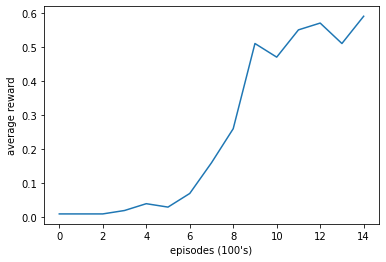

In [ ]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()